# Sklearn

## sklearn.linear_model

In [2]:
from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, linear_model, metrics

import numpy as np

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Линейная регрессия

#### Генерация данных

In [12]:
data, target, coef = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                              noise = 15., coef = True, random_state = 2)

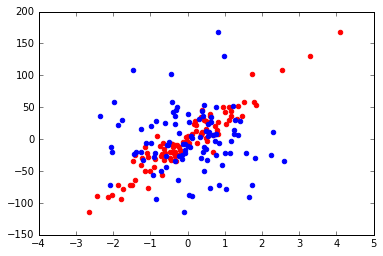

In [14]:
pylab.scatter(map(lambda x:x[0], data), target, color = 'r')
pylab.scatter(map(lambda x:x[1], data), target, color = 'b')

In [15]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(data, target,  
                                                                                     test_size = 0.3)

#### LinearRegression

In [16]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_data, train_labels)
predictions = linear_regressor.predict(test_data)

In [17]:
print test_labels

[  50.02736548   51.48553841  -22.72383974  -71.8437398     5.17859936
  -64.33430773   10.87707108  -34.17493037    9.03851313    8.82287274
  -29.24256535  -72.42444391   37.04606959    8.10024945  -25.05112799
  -34.3449973   -90.27355633  -87.01920517  167.37130134    5.03703369
   44.78999357   -6.17267646   28.75572717  -76.32809271  -49.54465646
   30.60177416   30.61654725  -19.80415179    4.05760044 -114.79301893]


In [20]:
print predictions

[  39.97970121   50.89869481  -27.86773567  -68.41161877   -0.5252997
  -53.99463906   13.65166046  -55.37211493   12.71839125   30.82879126
  -17.86115188  -60.79311829   21.95002942    4.34078339  -11.88567339
   -9.49485602  -78.44881867  -76.68996506  152.03938874  -31.76165072
   42.33971154    7.25874615    8.0141315   -39.77903929  -38.49885186
   16.36621956   37.97818757  -17.66064218   -2.235439    -99.78722554]


In [21]:
metrics.mean_absolute_error(test_labels, predictions)

12.277925827449064

In [22]:
linear_scoring = cross_validation.cross_val_score(linear_regressor, data, target, scoring = 'mean_absolute_error', 
                                                  cv = 10)
print 'mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std())

mean: -12.2102144963, std: 3.22113134787


In [27]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better = True)

In [28]:
linear_scoring = cross_validation.cross_val_score(linear_regressor, data, target, scoring=scorer, 
                                                  cv = 10)
print 'mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std())

mean: 12.2102144963, std: 3.22113134787


In [29]:
coef

array([ 38.07925837,   0.        ])

In [30]:
linear_regressor.coef_

array([ 37.05590925,   1.1253401 ])

In [31]:
print "y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1])

y = 38.08*x1 + 0.00*x2


In [32]:
print "y = {:.2f}*x1 + {:.2f}*x2".format(linear_regressor.coef_[0], linear_regressor.coef_[1])

y = 37.06*x1 + 1.13*x2


#### Lasso

In [33]:
lasso_regressor = linear_model.Lasso(random_state = 3)
lasso_regressor.fit(train_data, train_labels)
lasso_predictions = lasso_regressor.predict(test_data)

In [34]:
lasso_scoring = cross_validation.cross_val_score(lasso_regressor, data, target, scoring = scorer, cv = 10)
print 'mean: {}, std: {}'.format(lasso_scoring.mean(), lasso_scoring.std())

mean: 12.2605919889, std: 3.04841098441


In [35]:
print lasso_regressor.coef_

[ 35.9616924   0.       ]


In [36]:
print "y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1])

y = 38.08*x1 + 0.00*x2


In [37]:
print "y = {:.2f}*x1 + {:.2f}*x2".format(lasso_regressor.coef_[0], lasso_regressor.coef_[1])

y = 35.96*x1 + 0.00*x2
